In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from synth_helpers import * 
import datetime
import os
import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import copy
import pickle

start_date = '2017-01-01'
end_date = '2020-01-01'
start_2 = '2020-01-02'
lockdown = '2020-03-15'
end_2_date = '2020-03-15'


In [44]:
# categories = ["burglary", "felony_assault", "grand_larceny","grand_larceny_mv","robbery"]
categories = ["Violent_Assault","Property_Theft","Property_Burglary","Drug_Drug","Violent_Robbery"]

coefs = dict()
pvals = dict()
for cat in categories: 
    df = pd.read_csv('../data/'+cat+'-pval.csv',index_col=0)
    pvals[cat] = df
    print df.head()
    df = pd.read_csv('../data/'+cat+'-coef.csv',index_col=0)
    coefs[cat] = df 
    print df.head()



                  p
ar1        0.000231
ma1        0.039392
intercept  0.000000
t          0.004314
Monday     0.347420
           res_arimas..category...coef
ar1                           0.469567
ma1                          -0.285633
intercept                   315.806444
t                           -66.026652
Monday                        2.148291
                      p
ar1        7.758611e-03
ar2        0.000000e+00
ma1        6.639285e-05
ma2        5.136811e-10
intercept  0.000000e+00
           res_arimas..category...coef
ar1                          -0.228685
ar2                           0.711065
ma1                           0.392795
ma2                          -0.567866
intercept                   370.646552
                  p
intercept  0.002747
t          0.039013
Monday     0.000000
Tuesday    0.000000
Wednesday  0.000000
           res_arimas..category...coef
intercept                    18.852264
t                            12.910276
Monday                        6

## p-values and holm-sidak correction

In [45]:
t_pvals = np.asarray([ np.format_float_scientific(pvals[cat].loc['t'].values[0],2) for cat in categories ] )
t_pvals_ = np.asarray([ pvals[cat].loc['t'].values[0] for cat in categories ] )



In [49]:
import statsmodels
from statsmodels.stats.multitest import multipletests
sort_order = np.argsort(t_pvals_)
sorted_p = t_pvals_[sort_order]
print sorted_p
res = multipletests(t_pvals_, alpha=0.05,method='holm-sidak')
print res[0]
adjusted_p = res[1]
print 'before adj', t_pvals_
print 'after adj', adjusted_p




[0.00431413 0.02409085 0.03901323 0.66952917 0.69266217]
[ True False False False False]
before adj [0.00431413 0.66952917 0.03901323 0.02409085 0.69266217]
after adj [0.02138532 0.89078903 0.11253297 0.09293676 0.89078903]


In [50]:
def latex_float(float_str):
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str
    
t_pvals
# "Violent_Assault","Property_Theft","Property_Burglary","Drug_Drug","Violent_Robbery"
cols = ["Violent Assault","Theft","Burglary","Drug","Robbery"]
# print_cats = [x.replace('_',' ') for x in cats]
print  '&' + " & ".join([  cols[j] for j in range(len(cols))])  + '\\\\ \hline'
print  'p-value &' + " & ".join([  '$'+latex_float(t_pvals[j])+'$' for j in range(len(cols))])  + '\\\\ \hline'
print "Adjusted p" + "&" + " & ".join([ '$'+ latex_float(np.format_float_scientific(adjusted_p[ind],2))+'$' for ind in range(len(cols))] )  + '\\\\ '




&Violent_Assault & Theft & Burglary & Drug & Robbery\\ \hline
p-value &$4.31 \times 10^{-3}$ & $6.7 \times 10^{-1}$ & $3.90 \times 10^{-2}$ & $2.41 \times 10^{-2}$ & $6.93 \times 10^{-1}$\\ \hline
Adjusted p&$2.14 \times 10^{-2}$ & $8.91 \times 10^{-1}$ & $1.13 \times 10^{-1}$ & $9.29 \times 10^{-2}$ & $8.91 \times 10^{-1}$\\ 


In [15]:
daily_combined

,date,Drug_Drug,Gambling_Gambling,Property_Arson,Property_Burglary,Property_Other Property Crime,Property_Theft,Property_White Collar,Violent_Assault,Violent_Homicide,Violent_Rape,Violent_Robbery,t
0,2017-01-02,21,NaN,6.0,31,19,289,34,209,2.0,2.0,45,0
1,2017-01-03,49,NaN,2.0,33,21,409,48,238,1.0,5.0,48,0
2,2017-01-04,82,NaN,4.0,36,19,341,48,246,3.0,5.0,38,0
3,2017-01-05,83,NaN,NaN,37,16,345,58,239,NaN,1.0,48,0
4,2017-01-06,90,NaN,1.0,39,14,318,36,218,1.0,6.0,42,0
5,2017-01-07,37,NaN,1.0,21,10,314,31,168,2.0,4.0,30,0
6,2017-01-08,28,NaN,3.0,18,7,232,24,190,NaN,1.0,20,0
7,2017-01-09,33,NaN,2.0,36,13,285,31,221,NaN,2.0,27,0
8,2017-01-10,67,NaN,1.0,34,13,339,45,228,1.0,3.0,39,0
9,2017-01-11,79,1.0,1.0,35,25,313,48,208,NaN,3.0,45,0


In [38]:
df = pd.read_csv('../data/fitted_values.csv',index_col=0,sep=" ")

daily_combined = pd.read_csv('../../incident_series_newyork_update.csv',index_col=0)
# daily_combined = pd.read_excel('../daily_combined.xlsx',index_col=0,sep=" ")
yearsToPlot = pd.to_datetime(daily_combined.index)
yearsToPlot

ind = np.where(yearsToPlot==end_2_date)[0][0]



In [39]:
ind

1168

Drug_Drug
Property_Burglary
Property_Theft
Violent_Assault
Violent_Robbery


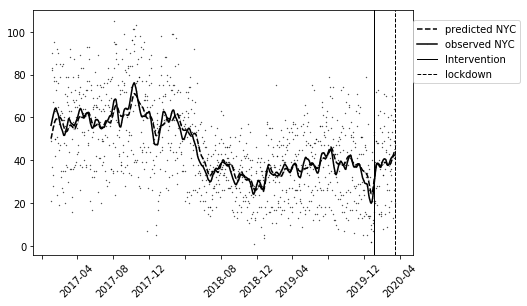

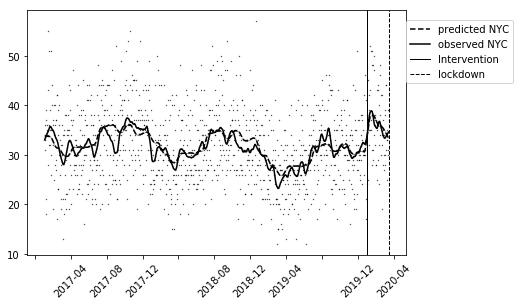

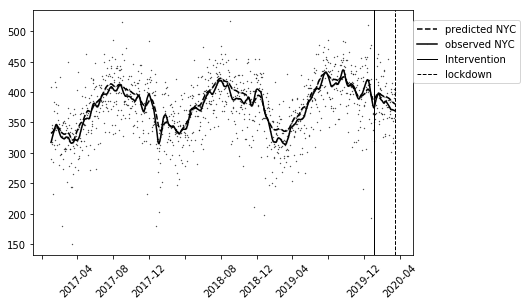

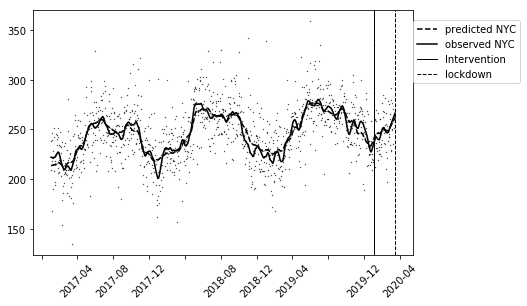

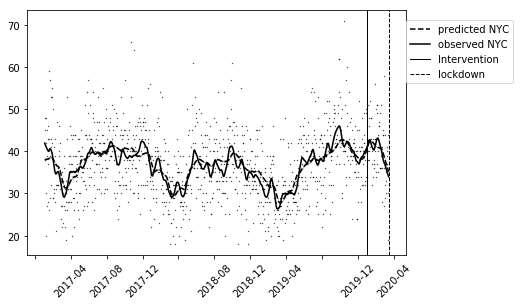

In [43]:
loess_frac=0.025
lockdown = '2020-03-15'
yearsToPlot_ = yearsToPlot[0:ind]

# ylims = [(20,50),(35,70),(80,200),(5,25), (20,55)]

for ind_,cat in enumerate(categories): 
    print cat
    plt.figure()
    ax=plt.gca(); plt.tight_layout()
    predicted = df[cat][0:ind].values
    real_nyc = daily_combined[cat][0:ind].values
    
    pred_smooth = sm.nonparametric.lowess(predicted, range(len(yearsToPlot_)),return_sorted=False,frac=loess_frac)
    loess_predicted=sm.nonparametric.lowess(real_nyc, range(len(yearsToPlot_)),return_sorted=False,frac=loess_frac)

    plt.scatter(yearsToPlot_, real_nyc, s=0.1,color='black');


    plt.plot_date(yearsToPlot_, pred_smooth, color='black', label='predicted NYC',ls='--',markersize=0.05);
    plt.plot_date(yearsToPlot_, loess_predicted, color='black', label='observed NYC',ls='solid',markersize=0.05);
    
    plt.axvline(x=end_date, linewidth=1, color='black', label='Intervention');
    plt.axvline(x=lockdown, linewidth=1, color='black', label='lockdown', linestyle='--')
    legend = plt.legend(loc=(1,0.7), shadow=False)
#     plt.ylim(ylims[ind_])
    plt.setp(ax.get_xticklabels()[::4], visible=False)
    plt.xticks(rotation=45)
#     plt.title(cat)
    plt.savefig('figs/ITS_'+cat+'_loess_'+  '.pdf',bbox_inches='tight')
    pickle.dump(ax, open('figs/ITS_'+cat+'_.pkl', 'w'))



In [29]:
daily_combined['burglary']

date
2017-01-01    23
2017-01-02    31
2017-01-03    33
2017-01-04    36
2017-01-05    37
2017-01-06    39
2017-01-07    21
2017-01-08    18
2017-01-09    36
2017-01-10    34
2017-01-11    35
2017-01-12    34
2017-01-13    55
2017-01-14    43
2017-01-15    28
2017-01-16    32
2017-01-17    51
2017-01-18    36
2017-01-19    32
2017-01-20    39
2017-01-21    35
2017-01-22    26
2017-01-23    30
2017-01-24    51
2017-01-25    35
2017-01-26    35
2017-01-27    44
2017-01-28    40
2017-01-29    19
2017-01-30    37
              ..
2020-12-02    40
2020-12-03    49
2020-12-04    48
2020-12-05    47
2020-12-06    34
2020-12-07    45
2020-12-08    23
2020-12-09    38
2020-12-10    60
2020-12-11    52
2020-12-12    55
2020-12-13    33
2020-12-14    38
2020-12-15    45
2020-12-16    45
2020-12-17    22
2020-12-18    48
2020-12-19    48
2020-12-20    39
2020-12-21    36
2020-12-22    52
2020-12-23    49
2020-12-24    45
2020-12-25    44
2020-12-26    31
2020-12-27    30
2020-12-28    42
2020-12-2